In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
filepath = "./housing.csv"
df = pd.read_csv(filepath)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [55]:
df.columns.tolist()

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [56]:
df.shape

(545, 13)

In [57]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [58]:
for col in df.columns:
    random_idx = np.random.choice(df.index, size=40, replace=False)
    df.loc[random_idx, col] = np.nan

In [59]:
df.isnull().sum()

price               40
area                40
bedrooms            40
bathrooms           40
stories             40
mainroad            40
guestroom           40
basement            40
hotwaterheating     40
airconditioning     40
parking             40
prefarea            40
furnishingstatus    40
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             505 non-null    float64
 1   area              505 non-null    float64
 2   bedrooms          505 non-null    float64
 3   bathrooms         505 non-null    float64
 4   stories           505 non-null    float64
 5   mainroad          505 non-null    object 
 6   guestroom         505 non-null    object 
 7   basement          505 non-null    object 
 8   hotwaterheating   505 non-null    object 
 9   airconditioning   505 non-null    object 
 10  parking           505 non-null    float64
 11  prefarea          505 non-null    object 
 12  furnishingstatus  505 non-null    object 
dtypes: float64(6), object(7)
memory usage: 55.5+ KB


In [61]:
for col in df.columns:
    if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
        mode_value = df[col].mode(dropna=True)
        if not mode_value.empty:
            df[col] = df[col].fillna(mode_value[0])
    else:
        median_value = df[col].median(skipna=True)
        df[col] = df[col].fillna(median_value)

C:\Users\alex1\AppData\Local\Temp\ipykernel_7248\1239641485.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):


In [62]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [63]:
df_encoded = df.copy()
le = LabelEncoder()
cat_cols = df_encoded.select_dtypes(include='object').columns
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [64]:
target = "price"
df_encoded["price"] = pd.qcut(df_encoded[target], q=3, labels=["1", "2", "3"])

In [65]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,0
1,3,8960.0,4.0,4.0,4.0,1,0,0,0,0,3.0,0,0
2,2,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,0,1
3,3,7500.0,4.0,1.0,2.0,1,0,1,0,1,0.0,1,0
4,3,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,0


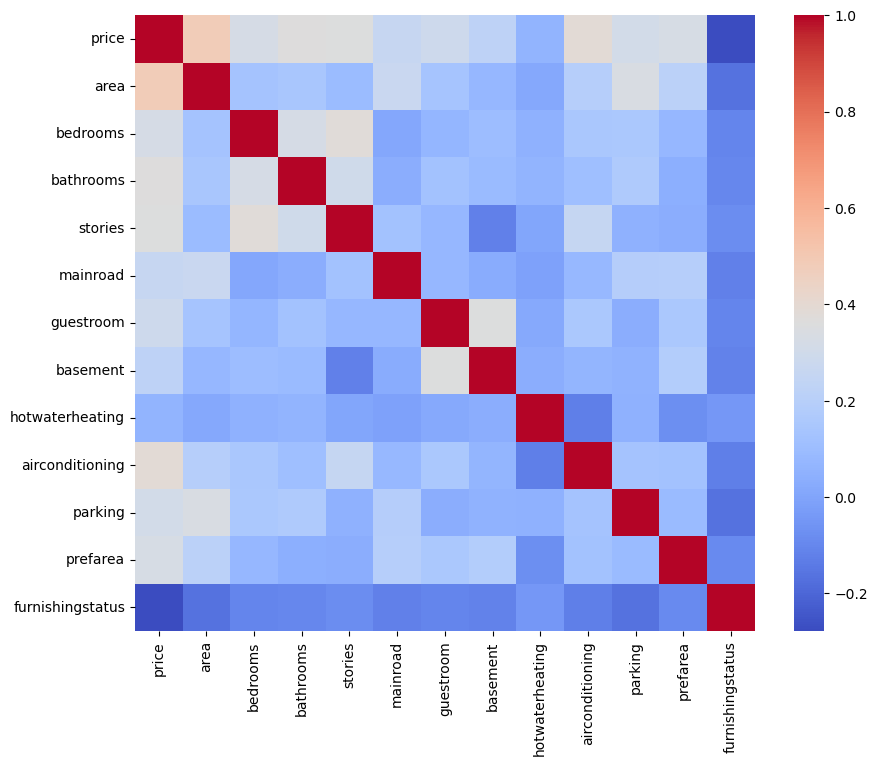

In [66]:
target = 'price'
plt.figure(figsize=(10, 8))
corr = df_encoded.corr()
sns.heatmap(corr, cmap="coolwarm")
plt.show()

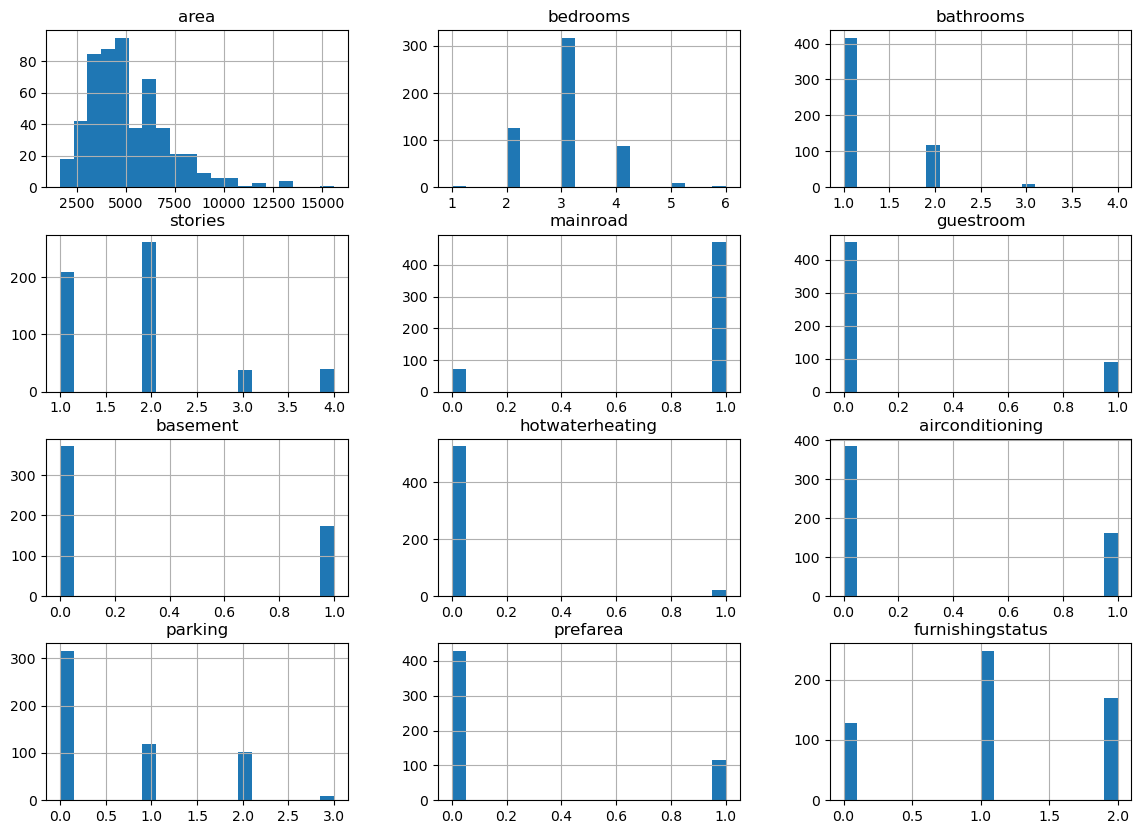

In [67]:
num_features = [col for col in df_encoded.columns if col != target]
df_encoded[num_features].hist(bins=20, figsize=(14, 10))
plt.show()

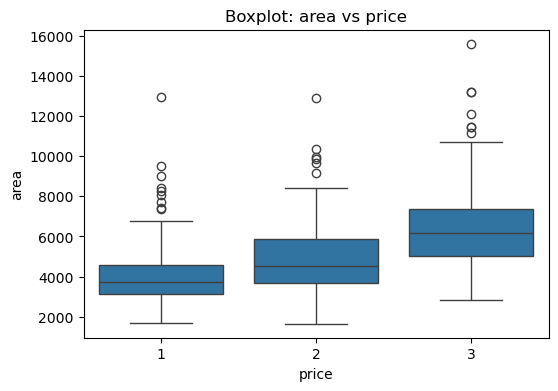

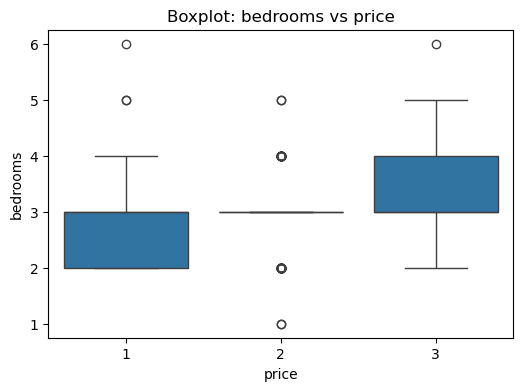

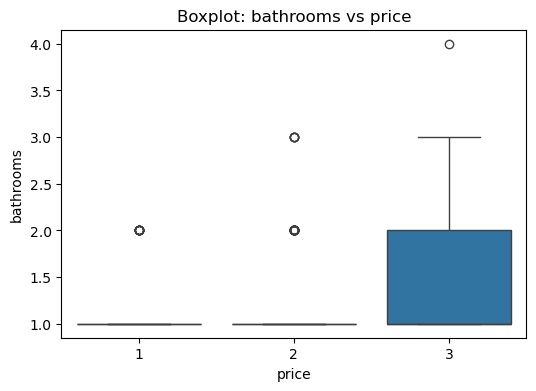

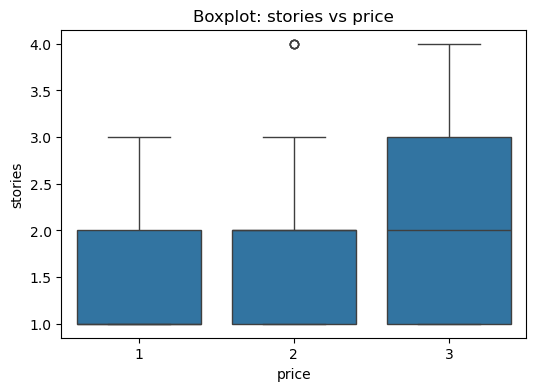

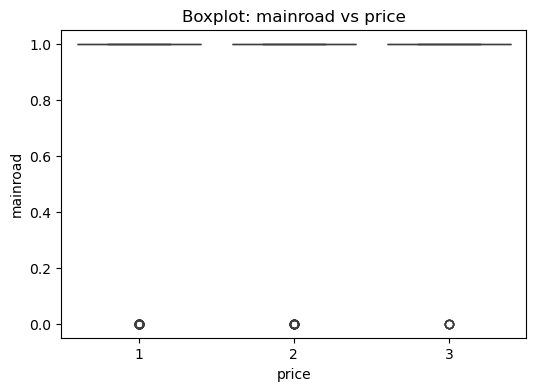

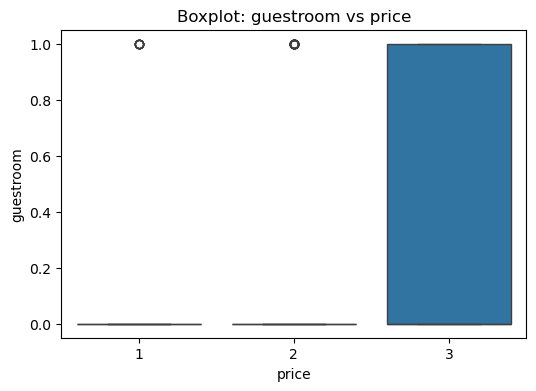

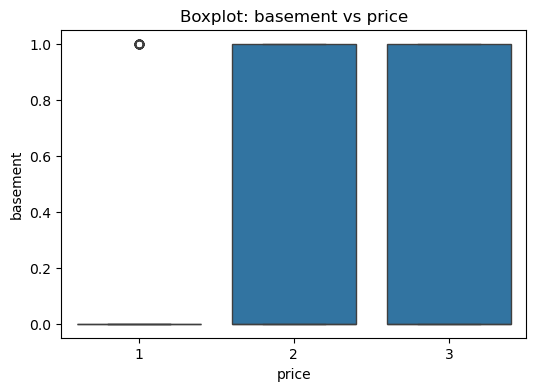

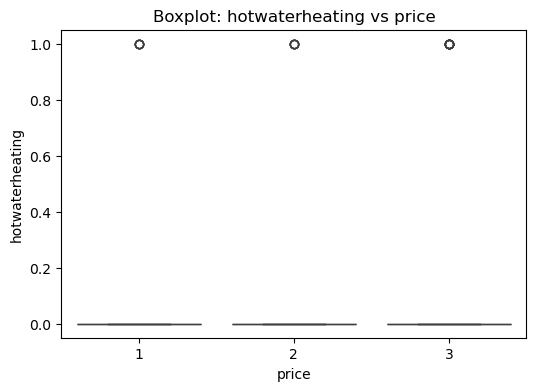

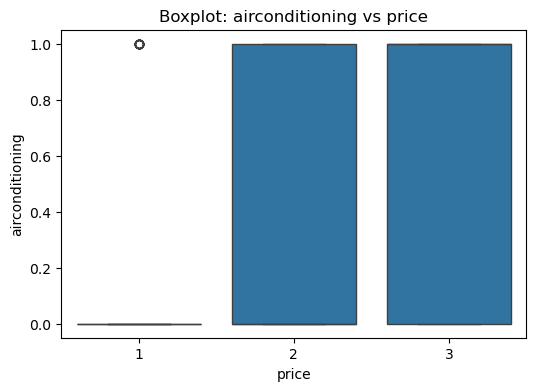

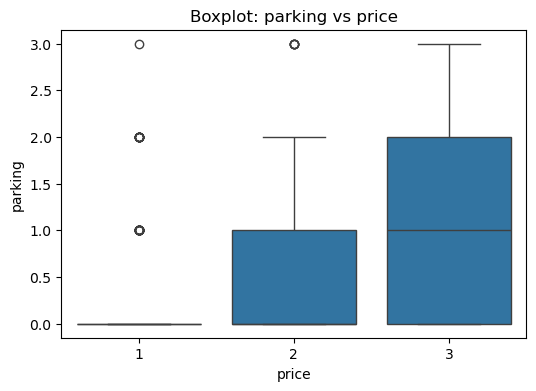

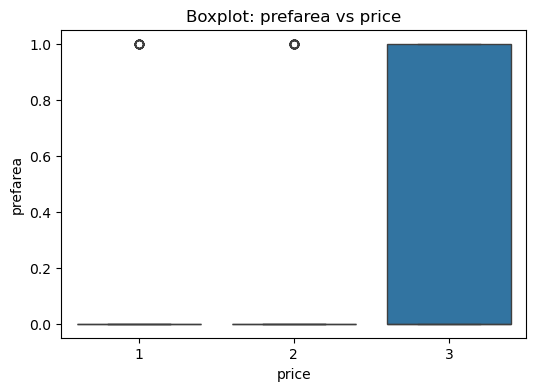

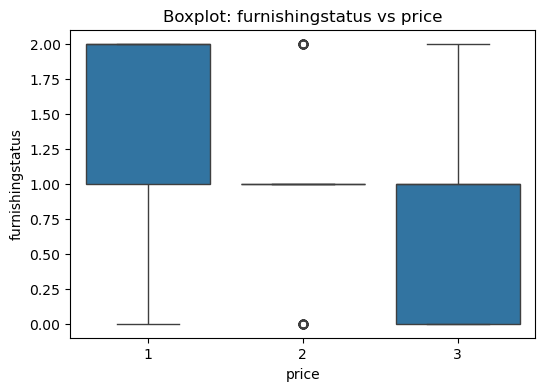

In [68]:
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_encoded[target], y=df_encoded[col])
    plt.title(f"Boxplot: {col} vs {target}")
    plt.show()

In [69]:
x = df_encoded.drop(columns=[target])
y = df_encoded[target]

In [70]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [72]:
param_grid_knn = {'n_neighbors': range(3, 16)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(x_train, y_train)
best_knn = grid_knn.best_estimator_
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(x_train, y_train)
best_svm = grid_svm.best_estimator_

In [73]:
rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(x_train, y_train)
ada = AdaBoostClassifier(n_estimators=200, random_state=0)
ada.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=200, random_state=0)


===== kNN =====
Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.64      0.62        36
           2       0.47      0.42      0.45        40
           3       0.66      0.70      0.68        33

    accuracy                           0.58       109
   macro avg       0.58      0.59      0.58       109
weighted avg       0.57      0.58      0.57       109



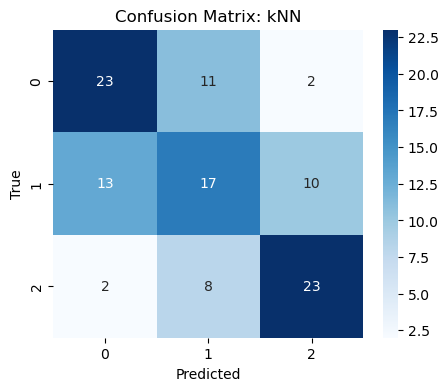


===== Decision Tree =====
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.44      0.50        36
           2       0.50      0.57      0.53        40
           3       0.63      0.67      0.65        33

    accuracy                           0.56       109
   macro avg       0.57      0.56      0.56       109
weighted avg       0.56      0.56      0.56       109



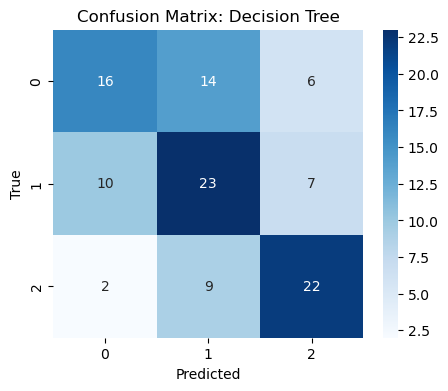


===== SVM =====
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.69      0.71        36
           2       0.55      0.60      0.57        40
           3       0.74      0.70      0.72        33

    accuracy                           0.66       109
   macro avg       0.67      0.66      0.67       109
weighted avg       0.67      0.66      0.66       109



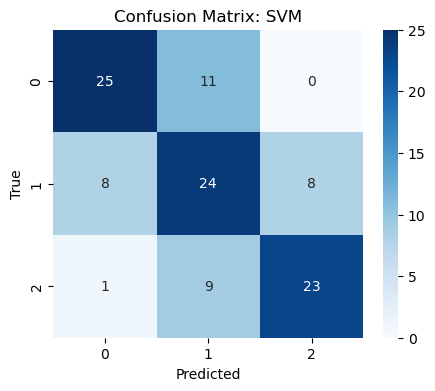


===== Random Forest =====
Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.58      0.62        36
           2       0.52      0.57      0.55        40
           3       0.73      0.73      0.73        33

    accuracy                           0.62       109
   macro avg       0.64      0.63      0.63       109
weighted avg       0.63      0.62      0.63       109



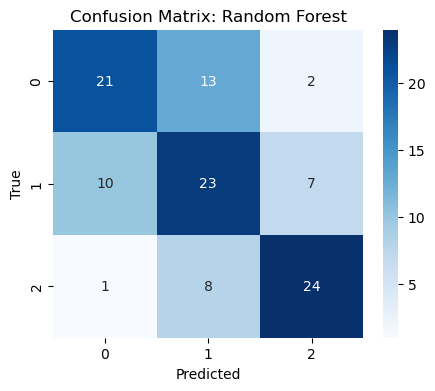


===== AdaBoost =====
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.69      0.70        36
           2       0.56      0.55      0.56        40
           3       0.71      0.76      0.74        33

    accuracy                           0.66       109
   macro avg       0.66      0.67      0.67       109
weighted avg       0.66      0.66      0.66       109



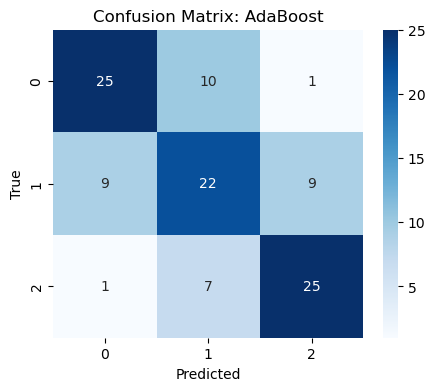

In [75]:
models = {
    "kNN": best_knn,
    "Decision Tree": tree,
    "SVM": best_svm,
    "Random Forest": rf,
    "AdaBoost": ada
}

for name, model in models.items():
    print(f"\n===== {name} =====")
    y_pred = model.predict(x_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [78]:
results = {}
for name, model in models.items():
    results[name] = model.score(x_test, y_test)

best_model_name = max(results, key=results.get)
print(best_model_name)
print(results[best_model_name])

SVM
0.6605504587155964
